In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
per_diet_recom_path = "../datasets/Personalized Medical Diet Recommendations Dataset/Personalized_Diet_Recommendations.csv"

In [4]:
df = pd.read_csv(per_diet_recom_path)
df

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P04996,42,Female,172,99,33.46,NaN,115,78,279,...,59,356,64,Western,Spicy,2869,70,402,68,Low-Carb Diet
4996,P04997,39,Female,155,61,25.39,NaN,110,97,258,...,119,164,112,Indian,NaN,1138,131,213,107,Low-Carb Diet
4997,P04998,48,Female,165,61,22.41,Diabetes,113,82,183,...,50,351,41,Mediterranean,Spicy,2893,40,380,34,Low-Carb Diet
4998,P04999,34,Other,151,82,35.96,Heart Disease,105,75,248,...,50,397,131,Asian,Salty,2201,56,367,128,Low-Fat Diet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                5000 non-null   object 
 1   Age                       5000 non-null   int64  
 2   Gender                    5000 non-null   object 
 3   Height_cm                 5000 non-null   int64  
 4   Weight_kg                 5000 non-null   int64  
 5   BMI                       5000 non-null   float64
 6   Chronic_Disease           2957 non-null   object 
 7   Blood_Pressure_Systolic   5000 non-null   int64  
 8   Blood_Pressure_Diastolic  5000 non-null   int64  
 9   Cholesterol_Level         5000 non-null   int64  
 10  Blood_Sugar_Level         5000 non-null   int64  
 11  Genetic_Risk_Factor       5000 non-null   object 
 12  Allergies                 1503 non-null   object 
 13  Daily_Steps               5000 non-null   int64  
 14  Exercise

In [6]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI',
       'Chronic_Disease', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Blood_Sugar_Level',
       'Genetic_Risk_Factor', 'Allergies', 'Daily_Steps', 'Exercise_Frequency',
       'Sleep_Hours', 'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits',
       'Caloric_Intake', 'Protein_Intake', 'Carbohydrate_Intake', 'Fat_Intake',
       'Preferred_Cuisine', 'Food_Aversions', 'Recommended_Calories',
       'Recommended_Protein', 'Recommended_Carbs', 'Recommended_Fats',
       'Recommended_Meal_Plan'],
      dtype='object')

In [7]:
df["Recommended_Meal_Plan"].unique()

array(['High-Protein Diet', 'Balanced Diet', 'Low-Fat Diet',
       'Low-Carb Diet'], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

In [9]:
# Selecting target and features
target = 'Recommended_Meal_Plan'
features = [col for col in df.columns if col != target and col != 'Patient_ID']

In [10]:
# Encoding categorical features
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [11]:
df

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P04996,42,Female,172,99,33.46,NaN,115,78,279,...,59,356,64,Western,Spicy,2869,70,402,68,Low-Carb Diet
4996,P04997,39,Female,155,61,25.39,NaN,110,97,258,...,119,164,112,Indian,NaN,1138,131,213,107,Low-Carb Diet
4997,P04998,48,Female,165,61,22.41,Diabetes,113,82,183,...,50,351,41,Mediterranean,Spicy,2893,40,380,34,Low-Carb Diet
4998,P04999,34,Other,151,82,35.96,Heart Disease,105,75,248,...,50,397,131,Asian,Salty,2201,56,367,128,Low-Fat Diet


In [12]:
# Splitting dataset
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Blood_Sugar_Level,...,Caloric_Intake,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats
4227,55,1,190,55,15.24,4,121,100,229,167,...,2127,98,152,100,3,1,1887,107,186,102
4676,47,0,158,91,36.45,0,154,113,172,180,...,3200,52,358,103,0,1,2802,63,310,110
800,29,1,199,65,16.41,2,94,91,231,99,...,2536,138,272,81,0,0,2335,156,313,75
3671,49,0,186,82,23.70,3,176,76,291,222,...,1482,112,311,45,2,2,1058,105,294,43
4193,39,2,164,77,28.63,3,156,93,160,119,...,1385,52,384,38,2,1,1018,45,340,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,44,2,169,51,17.86,3,102,74,204,141,...,1295,135,255,100,3,3,923,136,278,117
466,23,0,189,78,21.84,1,99,100,252,157,...,3030,85,316,71,3,1,2839,81,275,90
3092,21,0,190,93,25.76,4,138,84,160,238,...,3352,187,179,94,2,3,3036,206,136,87
3772,55,0,174,91,30.06,4,135,115,299,174,...,1852,118,162,105,2,3,1451,120,194,109


In [14]:
# Scaling numerical features
scaler = StandardScaler()
X_train[X_train.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    X_train[X_train.select_dtypes(include=['float64', 'int64']).columns]
)
X_test[X_test.select_dtypes(include=['float64', 'int64']).columns] = scaler.transform(
    X_test[X_test.select_dtypes(include=['float64', 'int64']).columns]
)

In [25]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=30, random_state=42)
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [26]:
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(max_depth=30, random_state=42)

In [28]:
# Predictions
y_pred = dt_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, y_pred):.2f}")

Accuracy: 1.00


In [48]:
dt_model.feature_importances_

array([0.02747953, 0.        , 0.        , 0.04043078, 0.07617414,
       0.        , 0.08119967, 0.        , 0.09533704, 0.07567233,
       0.        , 0.        , 0.03397149, 0.        , 0.02917146,
       0.        , 0.        , 0.        , 0.06469697, 0.09637132,
       0.06233086, 0.07054635, 0.03741378, 0.06936186, 0.01748889,
       0.        , 0.08897028, 0.03338326])

In [61]:
df

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P04996,42,Female,172,99,33.46,NaN,115,78,279,...,59,356,64,Western,Spicy,2869,70,402,68,Low-Carb Diet
4996,P04997,39,Female,155,61,25.39,NaN,110,97,258,...,119,164,112,Indian,NaN,1138,131,213,107,Low-Carb Diet
4997,P04998,48,Female,165,61,22.41,Diabetes,113,82,183,...,50,351,41,Mediterranean,Spicy,2893,40,380,34,Low-Carb Diet
4998,P04999,34,Other,151,82,35.96,Heart Disease,105,75,248,...,50,397,131,Asian,Salty,2201,56,367,128,Low-Fat Diet


In [64]:
df[["Age","Gender" ]]

,Age,Gender
0,56,Other
1,69,Female
2,46,Female
3,32,Female
4,60,Female
...,...,...
4995,42,Female
4996,39,Female
4997,48,Female
4998,34,Other


In [ ]:
features=['Age','Gender','BMI','Blood_Pressure_Systolic','Blood_Pressure_Diastolic','Cholesterol_Level','Blood_Sugar_Level','Genetic_Risk_Factor','Daily_Steps','Exercise_Frequency','Sleep_Hours','Alcohol_Consumption','Smoking_Habit','Dietary_Habits']

In [56]:
features_names = X_train.columns

Text(0.5, 0, 'Feature Importance')

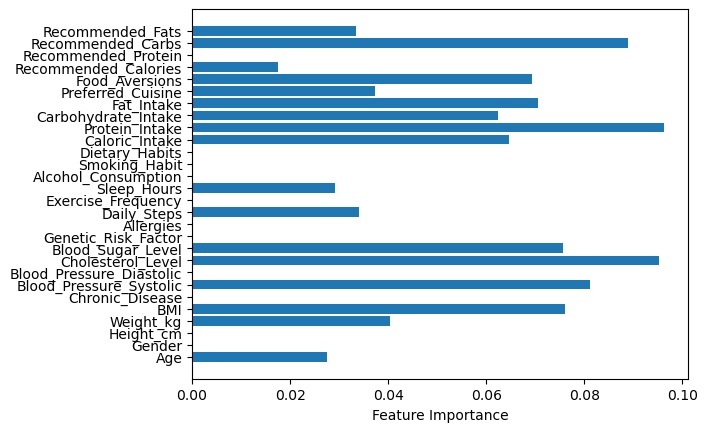

In [67]:
plt.barh(features_names, dt_model.feature_importances_)
plt.xlabel("Feature Importance")

In [49]:
# Displaying the Decision Tree
print(export_text(dt_model, feature_names=features))

|--- BMI <= 22.80
|   |--- Recommended_Carbs <= 371.50
|   |   |--- Cholesterol_Level <= 276.50
|   |   |   |--- Recommended_Fats <= 28.50
|   |   |   |   |--- Recommended_Carbs <= 295.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Recommended_Carbs >  295.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Recommended_Fats >  28.50
|   |   |   |   |--- Caloric_Intake <= 3436.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Caloric_Intake >  3436.00
|   |   |   |   |   |--- class: 2
|   |   |--- Cholesterol_Level >  276.50
|   |   |   |--- Sleep_Hours <= 7.75
|   |   |   |   |--- Protein_Intake <= 80.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Protein_Intake >  80.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Sleep_Hours >  7.75
|   |   |   |   |--- Carbohydrate_Intake <= 255.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Carbohydrate_Intake >  255.00
|   |   |   |   |   |--- class: 3
|   |--- Recommended_Carbs >  371.50
|   |   |-

In [24]:
# Plot the Decision Tree
plt.figure(figsize=(50,30), dpi= 300)
plot_tree(dt_model, feature_names=features, class_names=[str(cls) for cls in dt_model.classes_], filled=True, rounded=True, fontsize=10)
plt.show()


In [ ]:
# user input
list1=['age','gender',height, weight, bp, Cholesterol_Level,blood_sugar_lavel{diabetic or not if yes  ask if one under medication or not},Dietary_Habits]

In [ ]:
class RawtoTrain:
    def __init__(self):
        pass

    @staticmethod
    def bmi_converter(height_cm: int, weight_kg: int)
        return (weight_kg * 10000) / height_cm ** 2

    @staticmethod
    def blood_pressure_converter(systolic: int, diastolic: int):

        if systolic < 90 or diastolic < 60:
            return "Low"
        elif 90 <= systolic <= 129 and 60 <= diastolic <= 79:
            return "Normal"
        elif systolic > 129 or diastolic > 79:
            return "High"
        else:
            return "Normal"
        

    @staticmethod
    def cholesterol_converter(cholesterol_level: int):
        if cholesterol_level < 200:
            return "Low"
        elif 200 <= cholesterol_level < 240:
            return "Normal"
        else:
            return "High"

    @staticmethod
    def blood_sugar_converter(blood_sugar_level: int):
        pas

In [ ]:
def getBP(level = 'Normal'):
    dictionary = {
        'Low': (89, 59),
        'Normal': (119, 79),
        'High': (130, 80),
    }

    return dictionary[level]

In [ ]:
def raw_to_train_feature_conv(df):
    '''
    Takes in the original dataframe and returns the transformed df that is ready to train.
    Convert df into user required data format
    '''
    
    df["blood_pressure_converted"] = df.apply(lambda row: RawtoTrain.blood_pressure_converter(row["Blood_Pressure_Systolic"], row["Blood_Pressure_Diastolic"]), axis = 1)
                                              

In [ ]:
features=['Age','Gender','BMI','Blood_Pressure_Systolic','Blood_Pressure_Diastolic','Cholesterol_Level','Blood_Sugar_Level', 'Daily_Steps','Sleep_Hours','Alcohol_Consumption','Smoking_Habit','Dietary_Habits']

## To dos:
- BMI calculation from height and weight
- blood pressure range (High, Normal, Low)
- cholesterol_level
- blood_sugar_level

In [ ]:
from enum import Enum
class LevelValue(Enum):
    HIGH = 1
    NORMAL =2
    LOW = 3

In [ ]:
class Patient:
    def __init__(self, name: str, 
                age: int, gender: str, 
                height: float, weight: float, 
                blood_pressure: LevelValue, 
                cholesterol_level:LevelValue, 
                blood_sugar_level: LevelValue, 
                daily_steps: int,
                sleep_hours : int = 7, 
                alcohol_consumption : bool = False, 
                smoking_habit : bool = False, 
                dietary_habit: str = "Regular"
                ):
        pass

    def user_to_train_feature_conv(self):
        pass